<a href="https://colab.research.google.com/github/sidmahurkar/Likelihood-of-News-Virality/blob/master/Likelihood_of_virality_of_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install newspaper3k
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**As we need to predict the likelihood of news.  We need to train a supervised model for doing so and hence need to find some dataset where we can train our model for predicting such likelihood.**

**One such dataset available online is the *UCI Online News Popularity Datset* which can be used to train our model** 

Get the Online News Popularity Datset

In [4]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip
!unzip OnlineNewsPopularity.zip

--2020-04-28 17:50:59--  http://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7476401 (7.1M) [application/x-httpd-php]
Saving to: ‘OnlineNewsPopularity.zip.1’

OnlineNewsPopularit 100%[===================>]   7.13M  5.79MB/s    in 1.2s    

2020-04-28 17:51:00 (5.79 MB/s) - ‘OnlineNewsPopularity.zip.1’ saved [7476401/7476401]

Archive:  OnlineNewsPopularity.zip
replace OnlineNewsPopularity/OnlineNewsPopularity.names? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from toiNewsScraper import *

                    authors  ...                                            summary
0   [Reuters, Updated, Apr]  ...  Restaurants, cafes and cinemas will have to re...
1                        []  ...  Apr 28, 2020, 08:40AM ISTSource: APThe White H...
2                        []  ...  Apr 28, 2020, 08:43AM ISTSource: APWith tables...
3                        []  ...  Apr 28, 2020, 08:39AM ISTSource: APNorth Korea...
4                        []  ...  Apr 27, 2020, 08:27AM ISTSource: APThe videos,...
5                        []  ...  Apr 27, 2020, 08:40AM ISTSource: Times NowBrit...
6                        []  ...  Apr 27, 2020, 08:28AM ISTSource: APPolice say ...
7                        []  ...  Apr 22, 2020, 04:03PM ISTSource: APIndia's ext...
8                        []  ...  Apr 22, 2020, 03:58PM ISTSource: APIran's Revo...
9                        []  ...  As people across the globe stay home to stop t...
10                       []  ...  Apr 22, 2020, 03:57PM ISTSource: APFour mo

In [0]:
# Load the Dataset
df = pd.read_csv("OnlineNewsPopularity/OnlineNewsPopularity.csv") 

In [0]:
"""Extract the News from online sources, News from CNN and TOI can be Loaded
  according to the function mentoined in toiNewsScraper.py"""

url = "https://timesofindia.indiatimes.com/home/headlines"
dataframe = toiScraper()

In [8]:
dataframe.head()

,authors,publish date,text,images,movies,keywords,summary
0,"[Reuters, Apr]",None,Reuters photo\n\nDownload The Times of India N...,{https://static.toiimg.com/photo/74100661.cms?...,[],"[promoting, cooperation, trump, issue, russian...",Reuters photoDownload The Times of India News ...
1,[],None,"Apr 28, 2020, 05:08PM IST\n\nSource: AP\n\nThe...",{https://static.toiimg.com/thumb/imgsize-37757...,[],"[tedros, europe, continue, pandemic, coronavir...","Apr 28, 2020, 05:08PM ISTSource: APThe head of..."
2,[],None,"Apr 28, 2020, 05:06PM IST\n\nSource: AP\n\nPri...","{https://ads.stickyadstv.com/auto-user-sync, h...",[],"[turn, uk, johnson, virus, work, life, beginni...","Apr 28, 2020, 05:06PM ISTSource: APPrime Minis..."
3,[],None,"Apr 28, 2020, 05:04PM IST\n\nSource: AP\n\nAcr...",{https://static.toiimg.com/thumb/imgsize-37757...,[],"[thinks, puts, worries, mask, pandemic, virus,...","Apr 28, 2020, 05:04PM ISTSource: APAcross the ..."
4,[],None,"Apr 28, 2020, 08:40AM IST\n\nSource: AP\n\nThe...",{https://timesofindia.indiatimes.com/photo/msi...,[],"[house, trump, testing, virus, wont, better, u...","Apr 28, 2020, 08:40AM ISTSource: APThe White H..."


This problem can be thought as both classificatoin and Regeressoin problem. For Classification we can setup a limit on the shares parameter. and for regeression problem we can directly calculate the value of number of shares.

# First we will try Classification approach

In [9]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [10]:
corr = df.corr()
print(corr)

                                 timedelta  ...    shares
 timedelta                        1.000000  ...  0.008662
 n_tokens_title                  -0.240320  ...  0.008783
 n_tokens_content                -0.062867  ...  0.002459
 n_unique_tokens                  0.002866  ...  0.000806
 n_non_stop_words                 0.000089  ...  0.000443
 n_non_stop_unique_tokens         0.003805  ...  0.000114
 num_hrefs                       -0.000832  ...  0.045404
 num_self_hrefs                   0.064530  ... -0.001900
 num_imgs                        -0.027636  ...  0.039388
 num_videos                       0.000936  ...  0.023936
 average_token_length             0.130465  ... -0.022007
 num_keywords                     0.046884  ...  0.021818
 data_channel_is_lifestyle        0.054492  ...  0.005831
 data_channel_is_entertainment   -0.049109  ... -0.017006
 data_channel_is_bus              0.055788  ... -0.012376
 data_channel_is_socmed           0.076287  ...  0.005021
 data_channel_

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


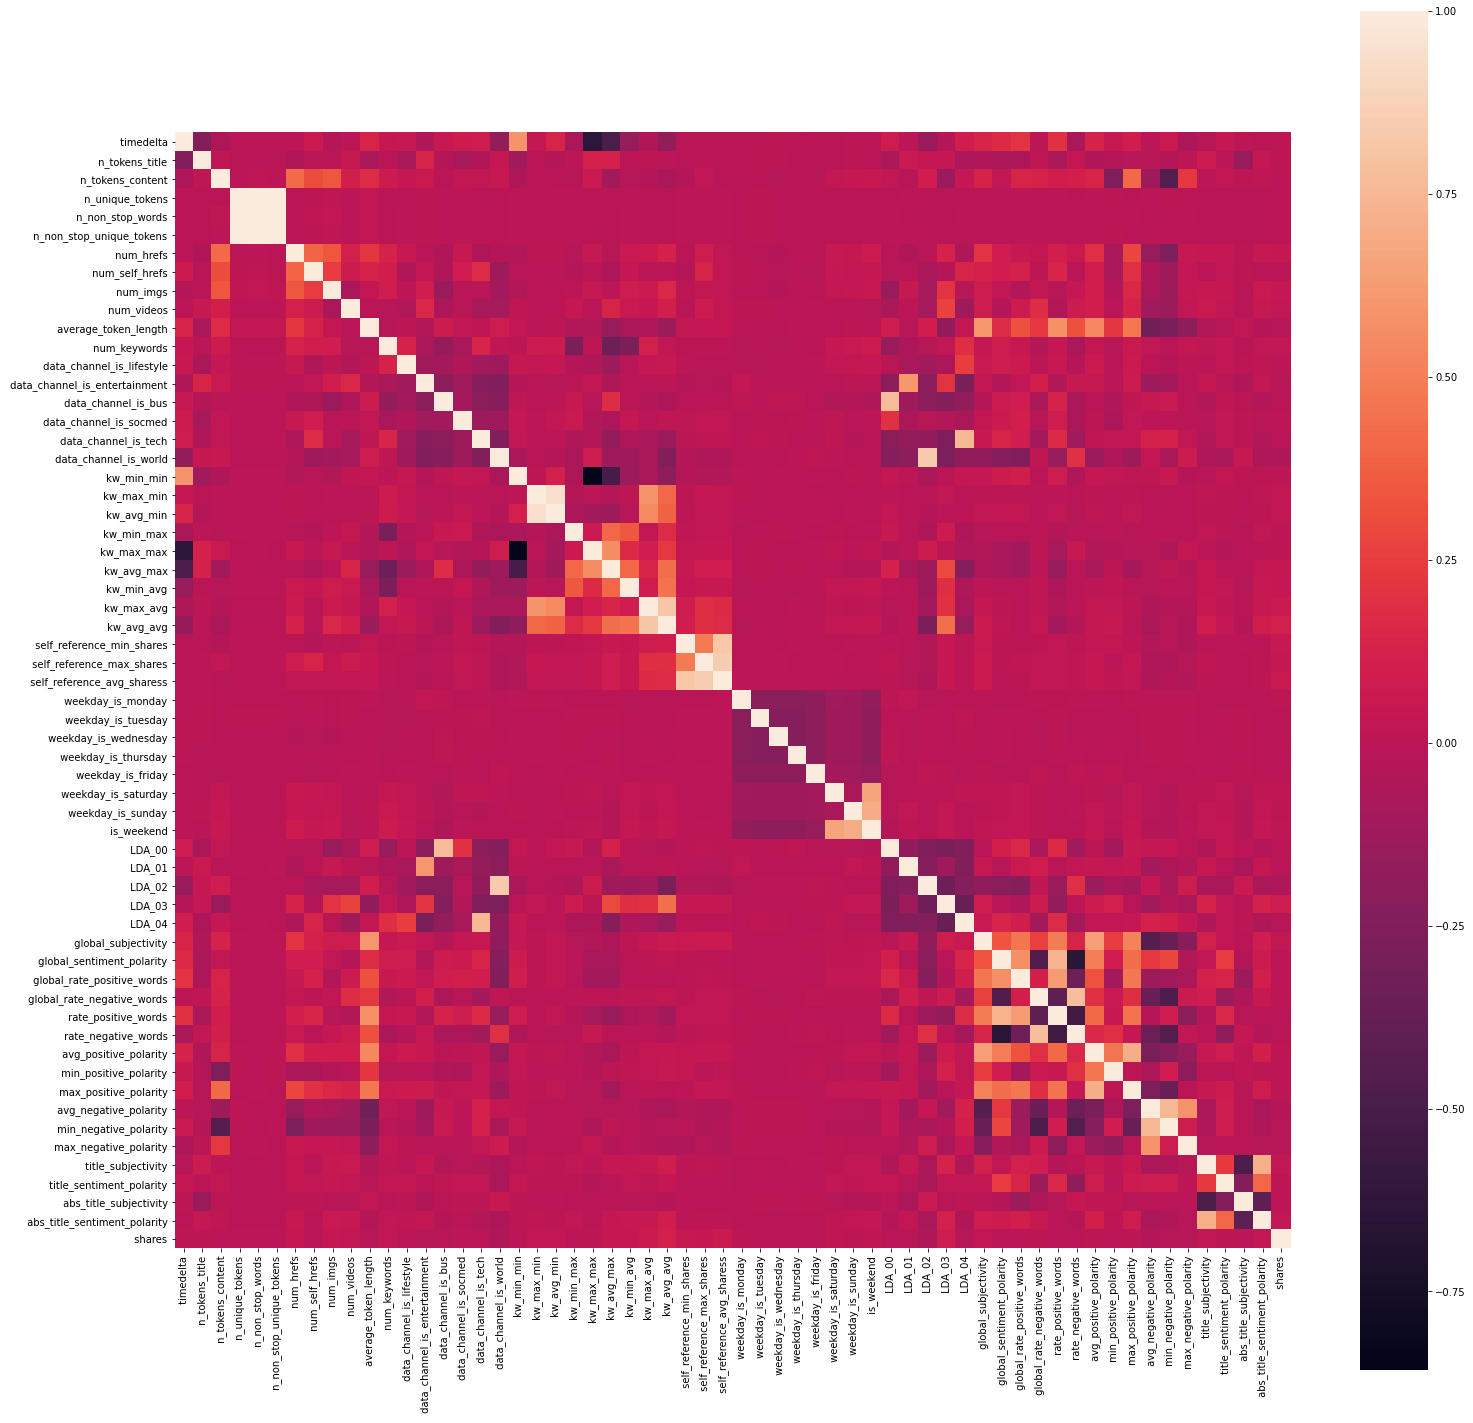

In [11]:
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(25,25))
sb.heatmap(corr, square = True)

**We need to remove certain features from the dataset as they are not available for the news we extracted. also we are relying on many features ( nearly 60 in this case) and can sometimes lead to a degradation in model performance.**

In [0]:
def clean_cols(data):
    """convert to lowercase."""
    clean_col_map = {x: x.lower().strip() for x in list(data)}
    return data.rename(index=str, columns=clean_col_map)

train_data = clean_cols(df)
x = train_data.drop(['url','shares', 'timedelta', 'lda_00','lda_01','lda_02','lda_03','lda_04','num_self_hrefs', 
                          'kw_min_min', 'kw_max_min', 'kw_avg_min','kw_min_max','kw_max_max','kw_avg_max','kw_min_avg','kw_max_avg','kw_avg_avg','self_reference_min_shares',
                          'self_reference_max_shares','self_reference_avg_sharess','rate_positive_words','rate_negative_words','abs_title_subjectivity','abs_title_sentiment_polarity',
             'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday'], 
                         axis=1)
 

In [0]:
y = train_data['shares']

In [0]:
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [0]:
# Encode the label by threshold 1200
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
popular_label = pd.DataFrame(label_encoder.fit_transform(y>=1200))

In [0]:
from sklearn.model_selection import train_test_split
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(x,popular_label, test_size = 0.2, random_state = 0)
clf = RandomForestClassifier(random_state=0, n_estimators=500)

In [17]:
clf.fit(X_train_RF, y_train_RF)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
pred = clf.predict(X_test_RF)

In [22]:
accuracy_score(pred, y_test_RF)

0.6656577121957372

# Simillarly we can also try Regression approach where we try to predict number of shares

In [24]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(x,y, test_size = 0.2, random_state = 0)

clf = RandomForestRegressor(random_state= 56)
clf.fit(X_train_RF, y_train_RF)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=56, verbose=0, warm_start=False)

In [27]:
res = pd.DataFrame(clf.predict(X_train_RF),list(y_train_RF))
res.head()

,0
821,1206.79
784,1251.27
1400,2366.19
781,987.09
2400,2209.65


# Now Change the Dataset according to the needs so that  it can passed to the Model

In [29]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def rate_unique(words):
    words=tokenize(words)
    no_order = list(set(words))
    rate_unique=len(no_order)/len(words)
    return rate_unique

def rate_nonstop(words):
    words=tokenize(words)
    filtered_sentence = [w for w in words if not w in stopwords]
    rate_nonstop=len(filtered_sentence)/len(words)
    no_order = list(set(filtered_sentence))
    rate_unique_nonstop=len(no_order)/len(words)
    return rate_nonstop,rate_unique_nonstop

def avg_token(words):
    words=tokenize(words)
    length=[]
    for i in words:
        length.append(len(i))
    return np.average(length)
    
def tokenize(text):
    text=text
    return word_tokenize(text)

In [0]:
from textblob import TextBlob
pos_words=[]
neg_words=[]
def polar(words):
    all_tokens=tokenize(words)
    for i in all_tokens:
        analysis=TextBlob(i)
        polarity=analysis.sentiment.polarity
        if polarity>0:
            pos_words.append(i)
        if polarity<0:
            neg_words.append(i)
    return pos_words,neg_words

In [0]:
def rates(words):
    words=polar(words)
    pos=words[0]
    neg=words[1]
    all_words=words
    global_rate_positive_words=(len(pos)/len(all_words))/100
    global_rate_negative_words=(len(neg)/len(all_words))/100
    pol_pos=[]
    pol_neg=[]
    for i in pos:
        analysis=TextBlob(i)
        pol_pos.append(analysis.sentiment.polarity)
        avg_positive_polarity=analysis.sentiment.polarity
    for j in neg:
        analysis2=TextBlob(j)
        pol_neg.append(analysis2.sentiment.polarity)
        avg_negative_polarity=analysis2.sentiment.polarity
    min_positive_polarity=min(pol_pos)
    max_positive_polarity=max(pol_pos)
    min_negative_polarity=min(pol_neg)
    max_negative_polarity=max(pol_neg)
    avg_positive_polarity=np.average(pol_pos)
    avg_negative_polarity=np.average(pol_neg)
    return global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity

In [35]:
df2=[]
for i in dataframe['text']:
    pred_info={}
    analysis=TextBlob(i)
    polarity=analysis.sentiment.polarity
    title_analysis=TextBlob(article.title)
    pred_info['text']= i
    pred_info['n_tokens_title']=len(tokenize(article.title))
    pred_info['n_tokens_content']=len(tokenize(article.text))
    pred_info['n_unique_tokens']=rate_unique(article.text)
    pred_info['n_non_stop_words']=rate_nonstop(article.text)[0]
    pred_info['n_non_stop_unique_tokens']=rate_nonstop(article.text)[1]
    pred_info['num_hrefs']=article.html.count("https://timesofindia.indiatimes.com")
    pred_info['num_imgs']=len(article.images)
    pred_info['num_videos']=len(article.movies)
    pred_info['average_token_length']=avg_token(article.text)
    pred_info['num_keywords']=len(article.keywords)
    
    if "life-style" in article.url:
        pred_info['data_channel_is_lifestyle']=1
    else:
        pred_info['data_channel_is_lifestyle']=0
    if "etimes" in article.url:
        pred_info['data_channel_is_entertainment']=1
    else:
        pred_info['data_channel_is_entertainment']=0
    if "business" in article.url:
        pred_info['data_channel_is_bus']=1
    else:
        pred_info['data_channel_is_bus']=0
    if "social media" or "facebook" or "whatsapp" in article.text.lower():
        data_channel_is_socmed=1
        data_channel_is_tech=0
        data_channel_is_world=0
    else:
        data_channel_is_socmed=0
    if ("technology" or "tech" in article.text.lower()) or ("technology" or "tech" in article.url):
        data_channel_is_tech=1
        data_channel_is_socmed=0
        data_channel_is_world=0
    else:
        data_channel_is_tech=0
    if "world" in article.url:
        data_channel_is_world=1
        data_channel_is_tech=0
        data_channel_is_socmed=0
    else:
        data_channel_is_world=0
        
    pred_info['data_channel_is_socmed']=data_channel_is_socmed
    pred_info['data_channel_is_tech']=data_channel_is_tech
    pred_info['data_channel_is_world']=data_channel_is_world
    
    if day(i)=="Monday":
        pred_info['weekday_is_monday']=1
    else:
        pred_info['weekday_is_monday']=0
    if day(i)=="Tuesday":
        pred_info['weekday_is_tuesday']=1
    else:
        pred_info['weekday_is_tuesday']=0
    if day(i)=="Wednesday":
        pred_info['weekday_is_wednesday']=1
    else:
        pred_info['weekday_is_wednesday']=0
    if day(i)=="Thursday":
        pred_info['weekday_is_thursday']=1
    else:
        pred_info['weekday_is_thursday']=0
    if day(i)=="Friday":
        pred_info['weekday_is_friday']=1
    else:
        pred_info['weekday_is_friday']=0
    if day(i)=="Saturday":
        pred_info['weekday_is_saturday']=1
        pred_info['is_weekend']=1
    else:
        pred_info['weekday_is_saturday']=0
    if day(i)=="Sunday":
        pred_info['weekday_is_sunday']=1
        pred_info['is_weekend']=1
    else:
        pred_info['weekday_is_sunday']=0
        pred_info['is_weekend']=0
        
    pred_info['global_subjectivity']=analysis.sentiment.subjectivity
    pred_info['global_sentiment_polarity']=analysis.sentiment.polarity
    pred_info['global_rate_positive_words']=rates(article.text)[0]
    pred_info['global_rate_negative_words']=rates(article.text)[1]
    pred_info['avg_positive_polarity']=rates(article.text)[2]
    pred_info['min_positive_polarity']=rates(article.text)[3]
    pred_info['max_positive_polarity']=rates(article.text)[4]
    pred_info['avg_negative_polarity']=rates(article.text)[5]
    pred_info['min_negative_polarity']=rates(article.text)[6]
    pred_info['max_negative_polarity']=rates(article.text)[7]    
    pred_info['title_subjectivity']=title_analysis.sentiment.subjectivity
    pred_info['title_sentiment_polarity']=title_analysis.sentiment.polarity
    df2.append(pred_info)

NameError: ignored

In [37]:
pred_df=pd.DataFrame(df2)
pred_test=pred_df.drop(['text'],axis=1)
pred_df.head()

""


Simillarly we can make predicions on Test Dataset